In [1]:
# install the full version of pycaret
!pip install pycaret[full]

     |████████████████████████████████| 264 kB 7.1 MB/s 
     |████████████████████████████████| 111 kB 68.4 MB/s 
     |████████████████████████████████| 80 kB 9.5 MB/s 
     |████████████████████████████████| 1.3 MB 58.2 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 6.8 MB 62.3 MB/s 
     |████████████████████████████████| 2.0 MB 14.1 MB/s 
     |████████████████████████████████| 248 kB 39.7 MB/s 
     |████████████████████████████████| 271 kB 62.1 MB/s 
     |████████████████████████████████| 167 kB 61.2 MB/s 
     |████████████████████████████████| 14.6 MB 83 kB/s 
     |████████████████████████████████| 1.7 MB 20.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 166.7 MB 7.8 kB/s 
     |████████████████████████████████| 356 kB 75.5 MB/s 
     |██████████████████

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASESTRX : Numbe of purchase transactions made
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/csv/CC GENERAL.csv")

In [4]:
df.head()

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749  ...          0.000000      12
1  C10002  3202.467416  ...          0.222222      12
2  C10003  2495.148862  ...          0.000000      12
3  C10004  1666.670542  ...          0.000000      12
4  C10005   817.714335  ...          0.000000      12

[5 rows x 18 columns]

In [5]:
!pip install dataprep
!pip install "dask[complete]"
!pip install "dask[delayed]"

     |████████████████████████████████| 1.8 MB 8.5 MB/s 
     |████████████████████████████████| 848 kB 29.5 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 366 kB 46.3 MB/s 
     |████████████████████████████████| 63 kB 2.6 MB/s 
     |████████████████████████████████| 1.3 MB 41.2 MB/s 
     |████████████████████████████████| 719 kB 58.1 MB/s 
     |████████████████████████████████| 1.5 MB 32.2 MB/s 
     |████████████████████████████████| 294 kB 58.0 MB/s 
     |████████████████████████████████| 142 kB 60.5 MB/s 
     |████████████████████████████████| 118 kB 58.9 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 743 kB 40.6 MB/s 
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13919 sha256=fbe1e4f310a69dce75ff49db4ec032a129e0afaa3af0ea89f32933759741a04c
  Stored in directory: /root/.cache/pip/wheels/1d/a8/cb/6f8902aa5457bd71344e00665c230e9c45255b3f57f

In [6]:
from dataprep.eda import create_report,plot,plot_correlation,plot_missing

NumExpr defaulting to 2 threads.


DataPrep Report
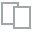
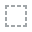
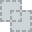
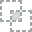
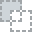
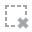
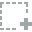
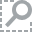
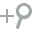
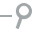
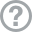
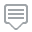
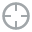
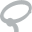
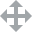
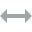
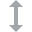
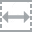
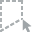
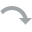
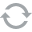
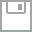
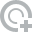
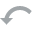
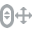
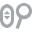
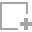
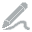
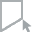
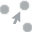
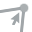
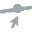

In [7]:
create_report(df)

In [8]:
df.drop('CUST_ID', axis=1, inplace=True)

In [9]:
df.dropna(subset= ['CREDIT_LIMIT'], inplace=True)

In [10]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

### Anomaly Detection Using Pycaret

<p>PyCaret's Anomaly Detection Module is an unsupervised ML  module that is used for identifying rare items,events or observation which raise suspicions by differing significantly from the majority of data. Typically ,the anomalous items will translate to some kind of problem such as bank fraud ,a structural defect,medical problems or errors .This module  provide several pre-processing feature that prepares the data for modeling through setup function.This modules has over 12 ready-to-use algorithms and several plots to analyze the results of trained models. 

In [11]:
# import anomaly detection modules
from pycaret.anomaly import *

In [13]:
# intialize the setup
exp_ano = setup(df)

Description                 Value
0                               session_id                  6413
1                            Original Data            (8949, 17)
2                           Missing Values                 False
3                         Numeric Features                    16
4                     Categorical Features                     1
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (8949, 23)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  anomaly-default-name
13                                     USI                  2919
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='UNSUPE

In [14]:
df

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0       40.900749           0.818182  ...          0.000000      12
1     3202.467416           0.909091  ...          0.222222      12
2     2495.148862           1.000000  ...          0.000000      12
3     1666.670542           0.636364  ...          0.000000      12
4      817.714335           1.000000  ...          0.000000      12
...           ...                ...  ...               ...     ...
8945    28.493517           1.000000  ...          0.500000       6
8946    19.183215           1.000000  ...          0.000000       6
8947    23.398673           0.833333  ...          0.250000       6
8948    13.457564           0.833333  ...          0.250000       6
8949   372.708075           0.666667  ...          0.000000       6

[8949 rows x 17 columns]

In [15]:
### create model
cluster = create_model('cluster')

create_model_container: 1
master_model_container: 1
display_container: 2
CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.05, n_clusters=8, n_jobs=-1, random_state=6413,
   use_weights=False)
create_model() succesfully completed......................................


In [16]:
## plot model cluster 
plot_model(cluster)

Rendering Visual


Visual Rendered Successfully
plot_model() succesfully completed......................................


In [17]:
### genrate prediction using trained model
cluster_predictions = predict_model(cluster  ,data = df)

Initializing predict_model()
predict_model(estimator=CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.05, n_clusters=8, n_jobs=-1, random_state=6413,
   use_weights=False), ml_usecase=MLUsecase.ANOMALY)


In [18]:
cluster_predictions

BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  TENURE  Anomaly  Anomaly_Score
0       40.900749           0.818182      95.40  ...      12        0    1680.682617
1     3202.467416           0.909091       0.00  ...      12        0    3534.112061
2     2495.148862           1.000000     773.17  ...      12        0    2016.703369
3     1666.670542           0.636364    1499.00  ...      12        0    1968.374512
4      817.714335           1.000000      16.00  ...      12        0    1225.757935
...           ...                ...        ...  ...     ...      ...            ...
8945    28.493517           1.000000     291.12  ...       6        0    1621.375732
8946    19.183215           1.000000     300.00  ...       6        0    1586.291504
8947    23.398673           0.833333     144.40  ...       6        0    1737.842651
8948    13.457564           0.833333       0.00  ...       6        0    2149.733887
8949   372.708075           0.666667    1093.25  ...       6        0    1755.998535

[8949 rows x 19 columns]

In [19]:
cluster_predictions["Anomaly"].value_counts()

0    8501
1     448
Name: Anomaly, dtype: int64

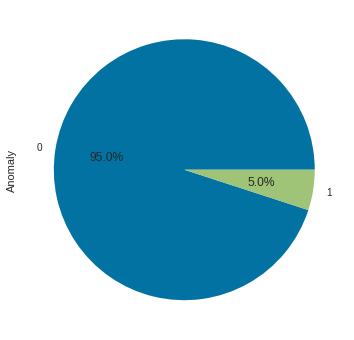

In [20]:
plt.figure(figsize=(6,6))
cluster_predictions["Anomaly"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [21]:
#This function initializes the training environment and creates the transformation pipeline.
# Setup function must be called before executing any other function.
# It takes one mandatory parameter: data. All the other parameters are optional.

In [22]:
from pycaret.clustering import *

In [23]:
exp_name = setup(data = cluster_predictions )

Description                 Value
0                               session_id                  4006
1                            Original Data            (8949, 19)
2                           Missing Values                 False
3                         Numeric Features                    17
4                     Categorical Features                     2
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (8949, 26)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  672f
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='UNSUPE

In [24]:
# training kmeans model
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.4503          3457.9135  ...           0             0

[1 rows x 6 columns]

create_model_container: 1
master_model_container: 1
display_container: 2
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=4006, tol=0.0001, verbose=0)
create_model() succesfully completed......................................


In [25]:
plot_model(kmeans, plot = 'cluster')

Rendering Visual


Visual Rendered Successfully
plot_model() succesfully completed......................................


In [26]:
#This function displays a user interface for analyzing performance of a trained model. It calls the plot_model function internally.
evaluate_model(kmeans)

Initializing evaluate_model()
evaluate_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=4006, tol=0.0001, verbose=0), fold=None, fit_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [27]:
#This function tunes the num_clusters parameter of a given model.
#tuned_kmeans = tune_model(model = 'kmeans', supervised_target = "Anomaly")

In [28]:
#This function generates cluster labels using a trained model.
kmeans_predictions = predict_model(model = kmeans, data = cluster_predictions)

Initializing predict_model()
predict_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=4006, tol=0.0001, verbose=0), ml_usecase=MLUsecase.CLUSTERING)


In [29]:
kmeans_predictions

BALANCE  BALANCE_FREQUENCY  ...  Anomaly_Score    Cluster
0       40.900749           0.818182  ...    1680.682617  Cluster 0
1     3202.467416           0.909091  ...    3534.112061  Cluster 3
2     2495.148862           1.000000  ...    2016.703369  Cluster 3
3     1666.670542           0.636364  ...    1968.374512  Cluster 3
4      817.714335           1.000000  ...    1225.757935  Cluster 0
...           ...                ...  ...            ...        ...
8945    28.493517           1.000000  ...    1621.375732  Cluster 0
8946    19.183215           1.000000  ...    1586.291504  Cluster 0
8947    23.398673           0.833333  ...    1737.842651  Cluster 0
8948    13.457564           0.833333  ...    2149.733887  Cluster 0
8949   372.708075           0.666667  ...    1755.998535  Cluster 0

[8949 rows x 20 columns]

In [30]:
#This function deploys the transformation pipeline and trained model on cloud.

In [31]:
##deploy_model(model = kmeans, model_name = 'kmeans-for-deployment', platform = 'aws', authentication = {'bucket' : 'S3-bucket-name'})